# Análise das amostras Valid DES - SV

A ideia principal será analisar algumas características da amostra Train disponibilizada pelo Dark Energy Survey e utilizada para treinar algoritmos. A amostra consta com dados de observações de aproximadamente 6400 galáxias.

## 0 - Setup 
Importando as bibliotecas que serão utilizadas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import healpy as hp

Lendo o arquivo e definindo cor por banda em uma variável que será reaproveitada entre os gráficos

In [3]:
headers=[
    "u_auto", "u_auto_err", "u_det", "u_det_err",
    "g_auto", "g_auto_err", "g_det", "g_det_err", 
    "r_auto", "r_auto_err", "r_det", "r_det_err", 
    "i_auto", "i_auto_err", "i_det", "i_det_err", 
    "z_auto", "z_auto_err", "z_det", "z_det_err", 
    "Y_auto", "Y_auto_err", "Y_det", "Y_det_err", 
    "z", "ra", "dec", "z_flags", "field_id", "number"
]

banda_cor = {
    "u": "r",
    "g": "m",
    "r": "b",
    "i": "c",
    "z": "g",
    "Y": "y",
}

data_frame = pd.read_csv("des_sv_main_standard.valid", delimiter=" ", names=headers)

## 1 - Localização das amostras no céu

### 1.1 - Plotando Declinação e Ascendência de Reta
Como nos foi disponibilizado as colunas de Ascendência de Reta (RA), equivalente ao eixo x no mapa celeste, e declinação (DEC), equivalente ao eixo y, podemos fazer uma associação (x,y) e localizar onde, no céu, foi coletado esses dados.

Para isso, vamos obter o valor máximo e mínimo de cada eixo e definir uma função que vai facilitar a nossa análise.

In [ ]:
x_min = data_frame.ra.min()
x_max = data_frame.ra.max()

y_min = data_frame.dec.min()
y_max = data_frame.dec.max()

print(x_min, x_max, y_min, y_max)

In [ ]:
def monta_grafico_ra_dec(x_min = (x_min-10), x_max = (x_max+10), y_min = (y_min-3), y_max = (y_max+3)):
    plt.plot(data_frame.ra, data_frame.dec, f"k.", alpha=0.1)
    plt.xlabel("ra", fontsize=16)
    plt.ylabel("dec", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [ ]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("RA x DEC", fontsize=18)

monta_grafico_ra_dec()

plt.tight_layout()

Para cada "boolinho", chamado de _field_, foi aproximado a visão, e conforme a quantidade aglomerada podemos perceber:
 1. Um aglomerado em cada hexágono;
     > Acontece por conta dos dados serem a junção de amostras mapeadas distintamentes e portanto podemosver a distribuição espacial heterogênea, e conforme os dados comuns foram mais analisados acabam aparecendo mais vezes. Portanto, não são ruidos os pontos que estão fora dos aglomerados de galáxias e sim apenas galáxias mapeadas diferentes.
         
 2. Uma espécie de tijolinhos formados nos aglomerados.
    > Causado por conta da câmera do DES, DECam. Cada tijolo é um sensor da câmera.
<img src="https://www.darkenergysurvey.org/wp-content/uploads/2016/02/DECam_fornax.jpg" width="200" height="300">

In [ ]:
def monta_grafico_ra_dec(x_min, x_max, y_min, y_max): 
    plt.plot(data_frame.ra, data_frame.dec, f"k.", alpha=0.1)
    plt.xlabel("ra", fontsize=16)
    plt.ylabel("dec", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [ ]:
plt.figure(figsize=[16,5], dpi=100)
plt.suptitle("localização da amostra (zoom)", fontsize=16)

plt.subplot(1,3,1)
monta_grafico_ra_dec(51.3, 54, -29.2, -27)

plt.subplot(1,3,2)
monta_grafico_ra_dec(35.3, 37.6, -5.8, -3.5)

plt.subplot(1,3,3)
monta_grafico_ra_dec(208.3, 211, 3.5, 6)
plt.xticks(fontsize=14)

plt.tight_layout()

### 1.2 - Projeção desses fields no em um mapa celeste.
Existem melhores formas de fazer essa query, mas a ideia aqui é ter uma noção, então, foi selecionado para cada field capturado, o ponto central, calculando a média da ascenção de reta (ra) e declinação (dec) dentro do conjunto.

In [ ]:
medias_1 = data_frame.query("ra > 50 & ra < 75 & dec < -25").mean()
print(medias_1.ra, medias_1.dec)
medias_2 = data_frame.query("ra < 50 & dec < 0 & dec > -10").mean()
print(medias_2.ra, medias_2.dec)
medias_3 = data_frame.query("ra > 50 & dec > 0").mean()
print(medias_3.ra, medias_3.dec)

logo após foi, para cada média dos fields criado vetores de localização para depois conseguir mostrar no mapa.

In [ ]:
NSIDE = 32
NPIX = hp.nside2npix(NSIDE)

vec1 = hp.ang2vec(round(medias_1.ra, 2), round(medias_1.dec,2), True)
vec2 = hp.ang2vec(round(medias_2.ra, 2), round(medias_2.dec,2), True)
vec3 = hp.ang2vec(round(medias_3.ra, 2), round(medias_3.dec,2), True)

print(vec1, vec2, vec3)

para cada vetor criado, foi selecionado todos os pontos com distancia de 1 radianos para mostrar no mapa, marcando assim a localização no céu.

In [ ]:
ipix_disc1 = hp.query_disc(nside=NSIDE, vec=vec1, radius=np.radians(1))
ipix_disc2 = hp.query_disc(nside=NSIDE, vec=vec2, radius=np.radians(1))
ipix_disc3 = hp.query_disc(nside=NSIDE, vec=vec3, radius=np.radians(1))

m = np.arange(NPIX)

m[ipix_disc1] = m.max()
m[ipix_disc2] = m.max()
m[ipix_disc3] = m.max()

hp.projview(m, 
            title="Disposição amostra", 
            graticule=True, 
            graticule_labels=True, 
            unit="NPIX distribution",
            xlabel="dec",
            ylabel="ra",
            projection_type="mollweide")

## 2 - Analisando a amostra por valor de magnitude e erro (no cálculo ou captura da amostra)

### 2.1 - Visão Geral

Primeiro, olhando o conteúdo separado, pode-se notar que dentro da nossa amostra total, para cada banda, existem alguns pontos com valores de erro e magnitude mais altos que a maioria dos pontos.

In [ ]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("Magnitude x Erro (grizY)", fontsize=16)

pos_grafico = 1

for key, value in banda_cor.items():
    plt.subplot(2,3,pos_grafico)
    plt.plot(data_frame[f"{key}_auto"], data_frame[f"{key}_auto_err"], f"{value}.", alpha=0.5)
    plt.xlabel(f"magnitude ({key}-band)", fontsize=14)
    plt.ylabel("erro", fontsize=14)
    plt.xlim(0, 120)
    plt.ylim(0, 120)
    plt.tight_layout()

    pos_grafico = pos_grafico + 1

Podemos ver, com base nos gráficos, que, as bandas com maior erro na captura da magnitude são as bandas mais extremas u e y. Também pode-se observar que para todas as bandas existem magnitudes que extrapolam, ou estão muito próximas ao valor de 100. Olhando com mais cautela, vemos que não necessáriamente são os mesmos pontos. O que pode configurar objetos com características diferentes, por exemplo, comparando evolução em questão de idade do objeto e emissão de comprimento de onda maior em certa banda. 

obs: Aqui limitamos em 5 só para conseguir ver na tabela alguns objetos com magnitude maior que 100

In [ ]:
data_frame.query("u_auto > 100").head(5)

In [ ]:
data_frame.query("Y_auto > 100").head(5)

É interessante também reparar que os valores de erros acima ou iguais a 99 podem ter sido colocados na mão por conta de perda de valores ou valores altos.

### 2.2 - Visão específica 

#### Olhando os pontos específicos de perto
Se quisermos dar uma olhada mais de perto no núcleo da amostra, limitando o eixo x e y, podemos perceber que novamente, conforme se aproxima da banda r e i tem-se um menor erro.

In [ ]:
def monta_grafico_plot(pos_grafico, key, x_min_limit, x_max_limit, y_min_limit=0, y_max_limit=100):
    plt.subplot(2,3,pos_grafico)
    plt.plot(data_frame[f"{key}_auto"], data_frame[f"{key}_auto_err"], f"{banda_cor.get(key)}.", alpha=0.1)
    plt.xlabel(f"magnitude ({key}-band)", fontsize=14)
    plt.ylabel("erro", fontsize=14)
    plt.xlim(x_min_limit, x_max_limit)
    plt.ylim(y_min_limit, y_max_limit)
    plt.tight_layout()

Como maior parte dos objetos, indiferente da banda, fica entre a magnitude 20 até 25, 26. Vale a pena limitar tanto a magnitude quanto o erro para ver melhor a disperção dos pontos nessa faixa mais ascendente.

In [ ]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("Magnitude x Erro (grizY)", fontsize=16)

monta_grafico_plot(1, "u", 18, 28, y_max_limit=5)
monta_grafico_plot(2, "g", 18, 26, y_max_limit=0.5)
monta_grafico_plot(3, "r", 18, 25, y_max_limit=0.2)
monta_grafico_plot(4, "i", 18, 25, y_max_limit=0.2)
monta_grafico_plot(5, "z", 18, 25, y_max_limit=0.5)
monta_grafico_plot(6, "Y", 18, 25, y_max_limit=3)

Analisando, podemos perceber que:
1. As bandas r e i respectivamente, possuiem os menores erros.
> Isso se deve ao fato de as bandas mais externas serem mais dificeis de capturar e, portanto, possuiem um maior erro.
<img src="Bandas.png">

### 2.3 - Comparativo com mais de uma banda

Para comparação, se adicionado em um único gráfico percebemos que no geral, a banda u e a banda Y recebem maior destaque por possuirem os maiores erros.

In [ ]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("Magnitude x Erro (grizY)", fontsize=16)

for key, value in banda_cor.items():
    plt.plot(data_frame[f"{key}_auto"], data_frame[f"{key}_auto_err"], f"{banda_cor.get(key)}.", alpha=0.3, label=key)

plt.xlabel(f"magnitude", fontsize=16)
plt.ylabel("erro", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(16, 24)
plt.ylim(0, 0.2)
plt.legend(loc="upper left", fontsize="xx-large", markerscale=3)
plt.tight_layout()

Pode ser interessante também, plotar as bandas com menor erro separadamente. Confirmando a proximidade das bandas r e i, por possuirem os menores erros de captura.

In [ ]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("Magnitude x Erro (banda r e i)", fontsize=16)

r = "r"
plt.plot(data_frame["r_auto"], data_frame["r_auto_err"], f"{banda_cor.get(r)}.", alpha=0.2, label="r")
i = "i"
plt.plot(data_frame["i_auto"], data_frame["i_auto_err"], f"{banda_cor.get(i)}.", alpha=0.2, label="i")

plt.xlabel(f"magnitude", fontsize=16)
plt.ylabel("erro", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(18, 24)
plt.ylim(0, 0.1)
plt.legend(loc="upper left", fontsize="xx-large", markerscale=3)
plt.tight_layout()

## 3 - Analisando amostra por quantidade

### 3.1 Visão geral

Construindo um gráfico para cada banda, percebemos que a maioria dos pontos fica ali na magnitude x e y e novamente vemos o nosso ponto com valor alto aparecendo acima da magnitude 100.

In [ ]:
def monta_grafico_hist(pos, key, x_min = 0, x_max = 120, y_min = 0, y_max = 500):
    plt.subplot(2,3,pos)
    plt.hist(data_frame[f"{key}_auto"], bins="fd", color=f"{banda_cor.get(key)}")
    plt.xlabel(f"magnitude ({key}_band)", fontsize=16)
    plt.ylabel("qtd", fontsize=16)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.tight_layout()

In [ ]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("Magnitude x Quantidade (em cada banda)", fontsize=16)

pos_grafico = 1

for key, value in banda_cor.items():
    monta_grafico_hist(pos_grafico, key)
    pos_grafico = pos_grafico + 1

Olhando mais de perto a distribuição dos dados pode-se perceber que a maior parte da amostra fica entre 15 - 25 de magnitude

In [ ]:
plt.figure(figsize=[16,10], dpi=150)
plt.suptitle("Magnitude x Quantidade (grizY)", fontsize=16)

monta_grafico_hist(1, "u", 18, 28, y_max = 450)
monta_grafico_hist(2, "g", 16, 26, y_max = 450)
monta_grafico_hist(3, "r", 15, 25, y_max = 450)
monta_grafico_hist(4, "i", 15, 25, y_max = 450)
monta_grafico_hist(5, "z", 15, 25, y_max = 450)
monta_grafico_hist(6, "Y", 15, 25, y_max = 450)

Para termos uma noção de quantos pontos são extremos para acima de 100, também vale a pena vê-los separados

In [ ]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("Magnitude x Quantidade (grizY)", fontsize=16)

monta_grafico_hist(1, "u", 100, 110, y_max = 300)
monta_grafico_hist(2, "g", 100, 110, y_max = 15)
monta_grafico_hist(4, "i", 100, 110, y_max = 50)
monta_grafico_hist(5, "z", 100, 110, y_max = 100)
monta_grafico_hist(6, "Y", 100, 110, y_max = 350)

Podemos perceber, com um gráfico comparativo entre todas as bandas, que:
1. A maior parte da amostra fica entre a magnitude 20 e 25.
2. Conforme aumenta-se o comprimento de onda menor a magnitude das galáxias na nossa amostra de treino

In [ ]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("Quantidade x Magnitude", fontsize=16)


for key, value in banda_cor.items():
    plt.hist(data_frame[f"{key}_auto"], bins="fd", color= value, label=key, alpha=0.3, ec=value, histtype="step", lw=3)

plt.xlabel(f"magnitude", fontsize=16)
plt.ylabel("qtd", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(15, 28)
plt.ylim(15, 500)

plt.legend(loc="upper left", fontsize="xx-large", markerscale=3)
plt.tight_layout()

Também podemos olhar que a nossa maior quantidade de itens com erro ficam muito próximo de zero e conforme aumenta-se a magnitude, ou seja, quanto menor o brilho aparente que o objeto tiver, o erro na sua captura vai aumentando também.

In [ ]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("Quantidade x Erro", fontsize=16)

for key, value in banda_cor.items():
        plt.hist(data_frame[f"{key}_auto_err"], bins="fd", label=key, alpha=0.3, ec=value, histtype="step", lw=3)

plt.xlabel(f"erro", fontsize=16)
plt.ylabel("qtd", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(ticks=[500, 1500], fontsize=15)
plt.xlim(0, 2)
plt.ylim(0, 1200)
plt.yscale("linear")

plt.legend(loc="upper right", fontsize="xx-large", markerscale=3)
plt.tight_layout()

In [ ]:
print("Quantidade de erros acima de 90 por banda.")
for key, value in banda_cor.items():
    tabela = data_frame.query(f"{key}_auto_err > 90").number.count()
    print(f"{key}_band: {tabela}.")

In [ ]:
data_frame.query(f"u_auto_err > 100")

Com um gráfico de quantidade por erro sendo o erros mais altos percebemos que a banda u possui mais dados que as demais com problemas na captura, visto que é a banda que é de menor capacidade de transmissão.  

obs: ignoramos os erros acima de 100 

In [ ]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("Quantidade x Erro", fontsize=16)

for key, value in banda_cor.items():
        plt.hist(data_frame[f"{key}_auto_err"], bins="fd", label=key, alpha=0.3, ec=value, histtype="step", lw=3)

plt.xlabel(f"erro", fontsize=16)
plt.ylabel("qtd", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(98.9, 99.1)
plt.ylim(0, 500)
plt.yscale("linear")

plt.legend(loc="upper right", fontsize="xx-large", markerscale=3)
plt.tight_layout()

# 3 - Razão sinal ruído. 

Para cada banda a razão sinal ruido pela magnitude, indica que, dado um ponto capturado, qual a chance de ele realmente ser um objeto no céu e não somente um erro de captura, visto que erros tendem a se anular conforme o erro varia. Aqui temos um para cada banda uma comparação sinal/ruido pela magnitude

In [ ]:
def mag_sr(pos, key, x_min=15, x_max=30, y_min=0, y_max=60):
    plt.subplot(2,3,pos)
    plt.plot(data_frame[f"{key}_auto"], 1/data_frame[f"{key}_auto_err"], f"{banda_cor.get(key)}.", alpha=0.2, label=key)

    plt.xlabel(f"magnitude ({key}_band)", fontsize=16)
    plt.ylabel("S/R", fontsize=16)

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlim(0, 40)
    plt.ylim(0, 20)
    plt.hlines(10, 0, 50)

In [ ]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("Magnitude x Sinal Ruido (grizY)", fontsize=16)

bandas = list(banda_cor)

mag_sr(1, bandas[0], 20, 28, 0, 15)
mag_sr(2, bandas[1], 21, 27, 0, 30)
mag_sr(3, bandas[2], 21, 26, 0, 30)
mag_sr(4, bandas[3], 21, 26, 0, 30)
mag_sr(5, bandas[4], 20, 26, 0, 30)
mag_sr(6, bandas[5], 19, 26, 0, 20)

plt.tight_layout()

# 4 - Distribuição Cor

Cor é definido como a diferença de magnitudes entre duas bandas. 
<img src="Bandas.png">

In [ ]:
def qtd_cor(key1, key2, x_min=-1, x_max=10, y_min=0, y_max=500, x_size=16):
    plt.hist(data_frame[f"{key1}_auto"]-data_frame[f"{key2}_auto"], bins="fd", alpha=0.2, label=f"{key1}-{key2}")

    plt.xlabel(f"color ({key1}-{key2})", fontsize=16)
    plt.ylabel("qtd", fontsize=16)

    plt.xticks(fontsize=x_size)
    plt.yticks(fontsize=16)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.vlines(0, 0, 500)

In [ ]:
plt.figure(figsize=[16,5], dpi=300)
plt.suptitle("Quantidade x Cor", fontsize=16)

plt.subplot(1,3,1)
qtd_cor("g", "r", x_min=-0.2, x_max=2.3, y_max=500)

plt.subplot(1,3,2)
qtd_cor("r", "i", x_min=-0.5, x_max=1.5, y_max=500, x_size=12)

plt.subplot(1,3,3)
qtd_cor("i", "z", x_min=-0.5, x_max=1.0, y_max=450, x_size=15)

plt.tight_layout()

In [ ]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("Cor x Quantidade", fontsize=16)

qtd_cor("g", "r", x_min=-0.2, x_max=2.3, y_max=500)
qtd_cor("r", "i", x_min=-0.5, x_max=2.3, y_max=500)
qtd_cor("i", "z", x_min=-0.5, x_max=2.3, y_max=500)
plt.legend(loc="upper right", fontsize="xx-large", markerscale=3)
plt.xlabel(f"color", fontsize=16)

plt.tight_layout()

Podemos observar que as maiores quantidades ficam acima de 0, e como diminuimos a banda r da g, isso significa que possuimos maiores magnitudes nas bandas r, i e z. Conforme estudado, magnitudes maiores significam menos brilho, e portanto, podemos concluir q os objetos são mais g, r e i.

# 5 - Color Color

In [ ]:
def cor_cor(key1, key2, key3, key4, x_min=-1, x_max=10, y_min=0, y_max=500, x_size=16):
    plt.plot(data_frame[f"{key1}_auto"]-data_frame[f"{key2}_auto"], data_frame[f"{key3}_auto"]-data_frame[f"{key4}_auto"], f"{banda_cor.get(key1)}.", alpha=0.2)

    plt.xlabel(f"color ({key1}-{key2})", fontsize=16)
    plt.ylabel(f"color ({key3}-{key4})", fontsize=16)

    plt.xticks(fontsize=x_size)
    plt.yticks(fontsize=16)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.vlines(0, -10, 10)
    plt.hlines(0, -10, 10)


In [ ]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("Cor x Cor", fontsize=16)

cor_cor("r", "i", "g", "r", x_min=-1, x_max=2, y_min=-0.5, y_max=5)

plt.tight_layout()

Aqui cada quadrado dividido representa que os objetos que estão dentro dessas áreas, aqui, podemos interpretar que:
1. Área superior direita: são objetos em que suas cores são uma combinação de r com g.
2. Área superior esquerda: são objetos que pendem mais para a cor i com g.
3. Área inferior direita: são objetos que sua maior cor é na banda r.
4. Área inferior esquerda: são objetos que suas cores estão na banda i e r.

In [ ]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("Cor x Cor", fontsize=16)

cor_cor("i", "z", "r", "i", x_min=-1, x_max=2, y_min=-0.5, y_max=2)

plt.tight_layout()

Aqui cada quadrado dividido representa que os objetos que estão dentro dessas áreas, aqui, podemos interpretar que:
1. Área superior direita: são objetos em que suas cores são uma combinação de r com i.
2. Área superior esquerda: são objetos que pendem mais para a cor z com r.
3. Área inferior direita: são objetos que sua maior cor é na banda i.
4. Área inferior esquerda: são objetos que suas cores estão na banda z e i.

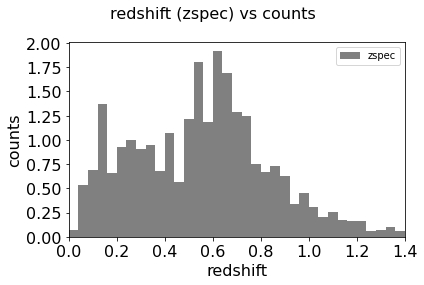

In [4]:
plt.suptitle("redshift (zspec) vs counts", fontsize=16)

plt.hist(data_frame["z"], np.arange(0,2,0.04), density=True, label="zspec", color="gray")

plt.xlabel("redshift", fontsize=16)
plt.ylabel("counts", fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()

plt.xlim(0, 1.4)

plt.tight_layout()

# 6 - 

# EXTRA - Todo ver como se calcula o 10σ

In [ ]:
def aa(key):
    ma = data_frame.query(f"{key}_auto_err > 0.09 & {key}_auto_err < 0.11")[f"{key}_auto"].max()
    mi = data_frame.query(f"{key}_auto_err > 0.09 & {key}_auto_err < 0.11")[f"{key}_auto"].min()
    print(round(mi,2), round(ma,2))

    σ = (ma+mi)/2
    print(f"{key}_band: {σ}")
    print()

In [ ]:
print("10σ value")
for banda in bandas:
    aa(banda)

In [ ]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("Magnitude x Sinal Ruido (grizY)", fontsize=16)

bandas = list(banda_cor)

mag_sr(1, bandas[0], 20, 25, 9, 11)
mag_sr(2, bandas[1], 21, 25, 9, 11)
mag_sr(3, bandas[2], 21, 25, 9, 11)
mag_sr(4, bandas[3], 21, 25, 9, 11)
mag_sr(5, bandas[4], 20, 25, 9, 11)
mag_sr(6, bandas[5], 19, 25, 9, 11)

plt.tight_layout()